In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# Specify dtype for columns 5 and 7
dtype = {5: str, 7: str}

df1 = pd.read_csv('/content/202406-citibike-tripdata_1.csv', dtype=dtype)
df2 = pd.read_csv('/content/202406-citibike-tripdata_2.csv', dtype=dtype)
df3 = pd.read_csv('/content/202406-citibike-tripdata_3.csv', dtype=dtype)
df4 = pd.read_csv('/content/202406-citibike-tripdata_4.csv', dtype=dtype)
df5 = pd.read_csv('/content/202406-citibike-tripdata_5.csv', dtype=dtype)

# Combine all datasets into one
df = pd.concat([df1, df2, df3, df4, df5])

# Reset the index of the combined DataFrame
df.reset_index(drop=True, inplace=True)

In [103]:
# Getting some general understanding of the dataframe
print(df.shape, '\n')
print(df.columns,'\n')
df.head()

(4783576, 13) 

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object') 



,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A38B171B6C31691A,electric_bike,2024-06-12 17:47:23.952,2024-06-12 17:50:27.312,E 89 St & 3 Ave,7265.10,1 Ave & E 94 St,7286.05,40.780499,-73.952185,40.781721,-73.945940,member
1,77E13C9D6559EA56,electric_bike,2024-06-04 16:48:42.876,2024-06-04 17:01:46.672,Pier 40 - Hudson River Park,5696.03,W 25 St & 9 Ave,6339.06,40.728060,-74.011184,40.747833,-74.000572,member
2,EA6418AD826D19D9,electric_bike,2024-06-01 13:36:28.502,2024-06-01 13:52:55.912,W 44 St & 5 Ave,6551.02,E 75 St & 3 Ave,6991.12,40.754621,-73.980641,40.771129,-73.957723,member
3,121CF2548FB65A29,classic_bike,2024-06-01 03:12:09.636,2024-06-01 03:16:29.531,Graham Ave & Withers St,5403.04,Meserole Ave & Manhattan Ave,5666.04,40.716981,-73.944859,40.727086,-73.952991,member
4,E6BE7FD2809649D6,electric_bike,2024-06-08 13:14:31.197,2024-06-08 13:24:09.858,E 9 St & Ave C,5616.01,Cleveland Pl & Spring St,5492.05,40.725241,-73.977735,40.722104,-73.997249,member


In [104]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values for each column:")
print(missing_values)

# Identify empty strings
empty_strings = df.eq('').sum()
print("\nEmpty string values for each column:")
print(empty_strings)

Missing values for each column:
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     1755
start_station_id       1755
end_station_name      12604
end_station_id        13691
start_lat                 0
start_lng                 0
end_lat                1279
end_lng                1279
member_casual             0
dtype: int64

Empty string values for each column:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [105]:
# repacing all missing values with 'Unknown'
df = df.fillna('Unknown')
print(df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


For my analysis, I am going to identify the most popular rideable_type.

The most popular start_station_id and end_station_id(including their corresponding names) for the entire month.

Identify the average time customers use the bikes for and the most common member_type.

              started_at  rideable_type   count
1  2024-05-27/2024-06-02  electric_bike  205197
3  2024-06-03/2024-06-09  electric_bike  712097
5  2024-06-10/2024-06-16  electric_bike  723188
7  2024-06-17/2024-06-23  electric_bike  741593
9  2024-06-24/2024-06-30  electric_bike  723854 



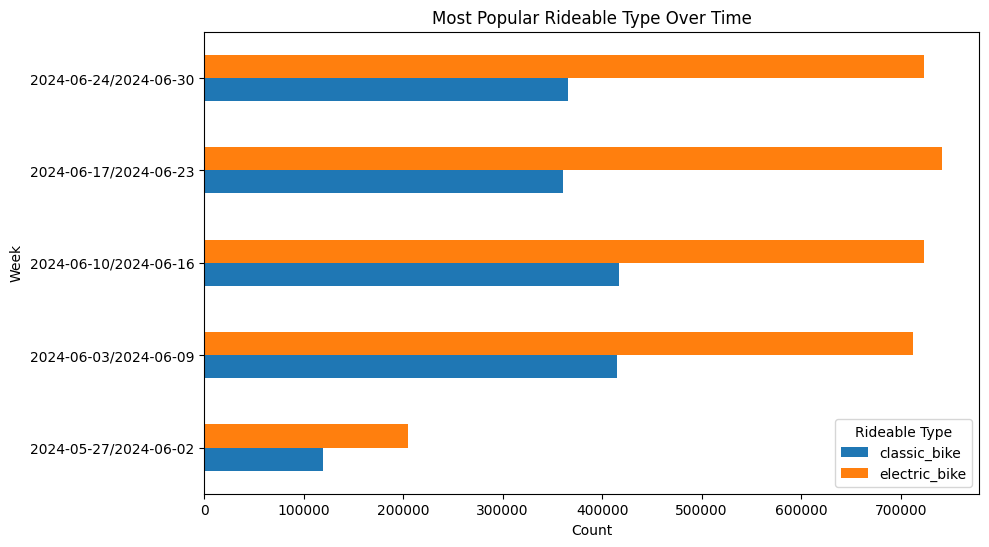

In [106]:
# Convert to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Group by month and rideable_type, and count the number of rides
df_grouped = df.groupby([df['started_at'].dt.to_period('W'), 'rideable_type']).size()

# Reset the index of the DataFrame and rename the columns
df_grouped = df_grouped.reset_index().rename(columns={0: 'count'})

# Find the most popular rideable_type for each Week
most_popular = df_grouped.loc[df_grouped.groupby('started_at')['count'].idxmax()]

print(most_popular,'\n')

# plot the results

# Pivot the data
df_pivot = df_grouped.pivot(index='started_at', columns='rideable_type', values='count').fillna(0)

# Create a horizontal bar plot
df_pivot.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Count')
plt.ylabel('Week')
plt.title('Most Popular Rideable Type Over Time')
plt.legend(title='Rideable Type')

plt.show()

The most popular start station ID is 5329.03 and it's name is West St & Chambers St.
The most popular end station ID is 5329.03 and it's name is West St & Chambers St.



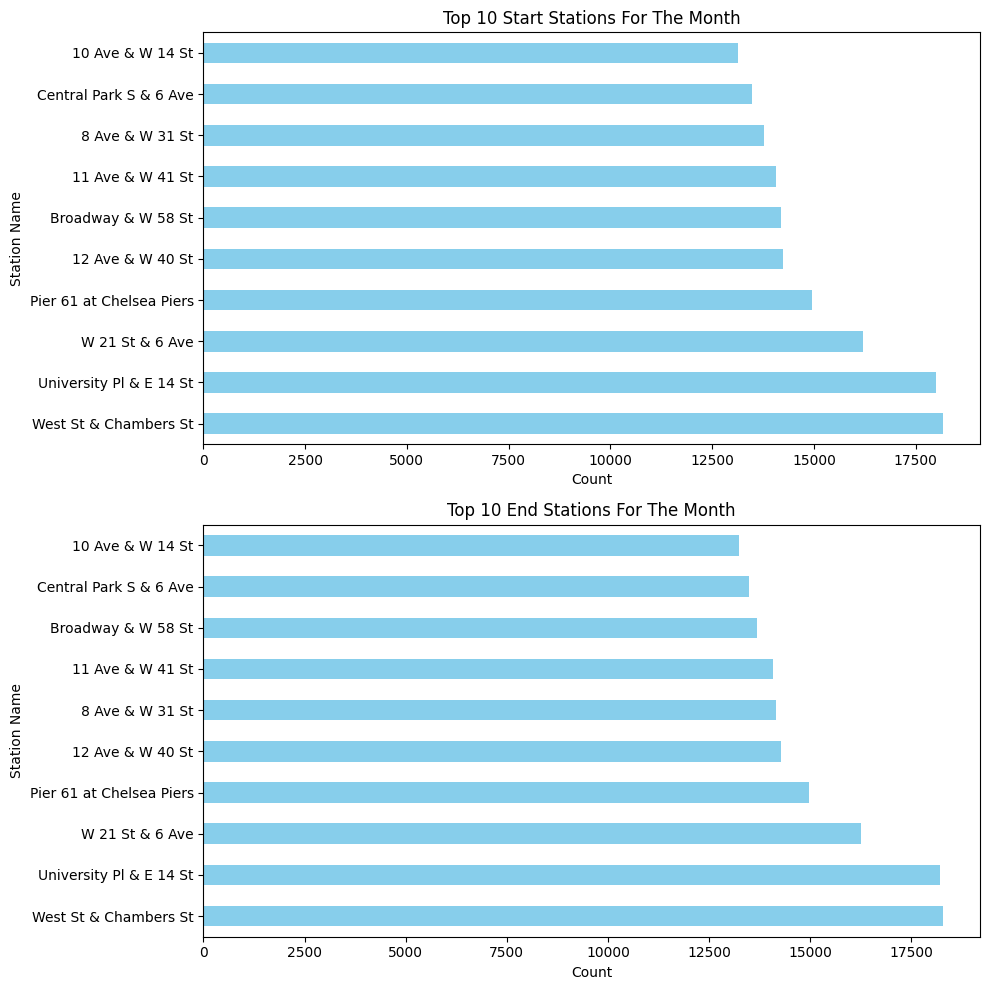

In [107]:
# Most popular start_station_id and it's name
popular_start_station = df['start_station_id'].value_counts().idxmax()
popular_start_station_name = df[df['start_station_id'] == popular_start_station]['start_station_name'].iloc[0]

print(f"The most popular start station ID is {popular_start_station} and it's name is {popular_start_station_name}.")

# Most popular end_station_id and it's name
popular_end_station = df['end_station_id'].value_counts().idxmax()
popular_end_station_name = df[df['end_station_id'] == popular_end_station]['end_station_name'].iloc[0]

print(f"The most popular end station ID is {popular_end_station} and it's name is {popular_end_station_name}.\n")

# Get counts for start and end stations
start_station_name_counts = df['start_station_name'].value_counts()
end_station_name_counts = df['end_station_name'].value_counts()

# Get top 10 start and end stations
top_start_station_names = start_station_name_counts.head(10)
top_end_station_names = end_station_name_counts.head(10)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot top 10 start stations
top_start_station_names.plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title('Top 10 Start Stations For The Month')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Station Name')

# Plot top 10 end stations
top_end_station_names.plot(kind='barh', ax=axs[1], color='skyblue')
axs[1].set_title('Top 10 End Stations For The Month')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Station Name')

# Display the plot
plt.tight_layout()
plt.show()

The average ride duration is 14.943394319134885 minutes.
The most common member type is 'member'.


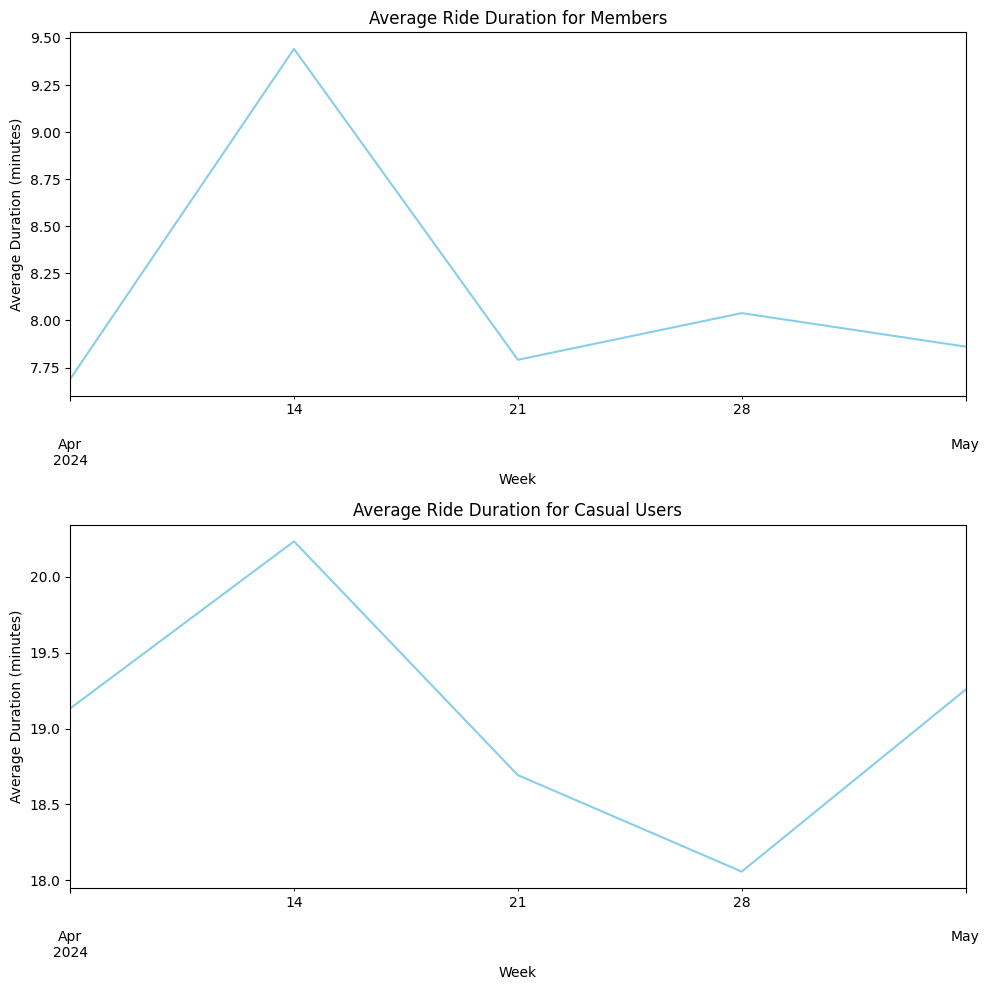

In [108]:
# Calculate ride duration in minutes
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Calculate average ride duration
average_ride_duration = df['ride_duration'].mean()

print(f"The average ride duration is {average_ride_duration} minutes.")

# Find the most common member_casual
most_common_member_casual = df['member_casual'].value_counts().idxmax()

print(f"The most common member type is '{most_common_member_casual}'.")

# Resample data on a weekly basis and calculate average ride duration
df_member_weekly = df_member.resample('W', on='started_at')['ride_duration'].mean()
df_casual_weekly = df_casual.resample('W', on='started_at')['ride_duration'].mean()

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot average ride duration for members
df_member_weekly.plot(kind='line', ax=axs[0], color='skyblue')
axs[0].set_title('Average Ride Duration for Members')
axs[0].set_xlabel('Week')
axs[0].set_ylabel('Average Duration (minutes)')

# Plot average ride duration for casual users
df_casual_weekly.plot(kind='line', ax=axs[1], color='skyblue')
axs[1].set_title('Average Ride Duration for Casual Users')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Average Duration (minutes)')

# Display the plot
plt.tight_layout()
plt.show()

Through the analysis of the dataset, several key trends have emerged for the month of June.

Firstly, the ‘electric_bike’ has emerged as the preferred choice among users, being chosen on average 40% more frequently than the ‘classic_bike’. This suggests a strong preference for electric bikes, possibly due to their ease of use and efficiency.

Secondly, the station ‘West St & Chambers St’ stands out as the most frequented start and end point for bike rides, followed closely by ‘University PL & E 14 ST’. These stations, being popular hubs, indicate high traffic areas and potential focal points for future service enhancements.

Lastly, It has been observed that ‘casual’ users tend to use the Citi Bike service for twice as long on average compared to ‘member’ users. While this could potentially be a cause for concern, further data is needed to understand the reasons behind this trend. Based on the current data, one could infer that members, possibly due to their familiarity with the bike stations and the city in general, tend to make shorter trips.

These insights provide valuable guidance for decision-making, from bike allocation and station maintenance, to user engagement and membership program development